In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
def setup_files(path):

    files = [os.path.join(path, i) for i in os.listdir(path)]
    folders = ['CV', 'lith', 'delith']

    for i in folders:
        if not os.path.exists(os.path.join(path, i)):
            os.mkdir(os.path.join(path, i))
        
    for i in os.listdir(path):
        if '_lith_' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'lith', i))
        elif '_delith' in i:
            os.rename(os.path.join(path, i), os.path.join(path, 'delith', i))
        elif i != 'README.txt' and len(i) > 7:
            os.rename(os.path.join(path, i), os.path.join(path, 'CV', i))
       
def cc(path, area, thickness, sample):

    cv_path = os.path.join(path, 'CV')
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')
    cv_df = pd.DataFrame()
    for i in os.listdir(cv_path):
        f = os.path.join(cv_path, i)
        df = pd.read_csv(f, sep = '\t')
        df['Current Density ($\mu$A/cm$^2$)'] = df['WE(1).Current (A)'] / area / 1e-6
        if '_Activation_' in i:
            df['CV'] = 'Initial'
        else:
            df['CV'] = 'Final'
        cv_df = pd.concat([cv_df, df], ignore_index=True)
    cv_df['Sample'] = sample
    lith_path = os.path.join(path, 'lith')
    delith_path = os.path.join(path, 'delith')
    lithiation = pd.DataFrame()
    delithiation = pd.DataFrame()
    capacity_l = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    capacity_d = pd.DataFrame(columns = ['Capacity', 'Cycle', 'L/D'])
    efficiency = pd.DataFrame()
    n = 0
    for i in os.listdir(lith_path):
        if '1C' in i:
            if '_' in i[-15:-14]:
                cycle = int(i[-14:-13])
            else:
                cycle = int(i[-15:-13] )

            file = os.path.join(lith_path, i)
            df = pd.read_csv(file, sep = '\t')
            df['Cycle'] =  cycle
            df['Capacity (mAh/cm$^3$)'] = -df['WE(1).Charge (C)'] /3.6 / (area * 1e-7 * thickness)
            
            lithiation = pd.concat([lithiation, df], ignore_index=True)
            capacity_l.loc[n] = (max(df['Capacity (mAh/cm$^3$)']), cycle, 'Lithiation')
            
        n += 1
    lithiation['Sample'] = sample
    capacity_l = capacity_l.sort_values(by = ['Cycle'])
    capacity_l['Sample'] = sample
    
    
    return cv_df, lithiation, capacity_l


Text(0, 0.5, 'Potential vs Li$^+$/Li (V)')

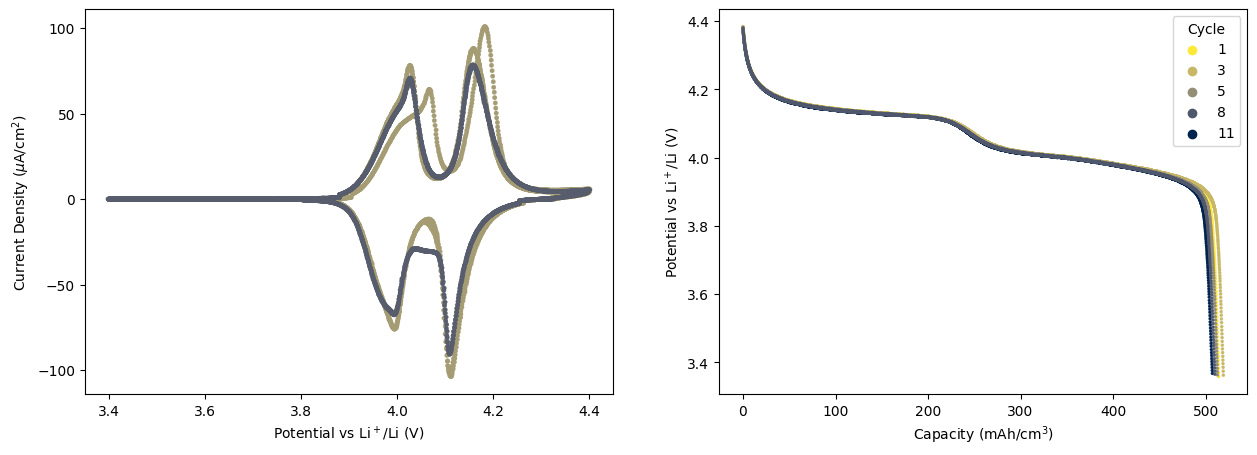

In [101]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_01\0A_00_2 - Copy'
area = 0.63
thickness = 70
sample = 'As-prepared'
palette = 'cividis_r'
# setup_files(path) Done
cv, lith, capacity = cc(path, area, thickness, sample)

fig, ax = plt.subplots(1,2, figsize = (15, 5), dpi = 100)
sns.scatterplot(data = cv, x = 'WE(1).Potential (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'CV', edgecolor = None, s = 10, ax = ax[0], legend = False, palette=palette)

sns.scatterplot(data = lith, x = 'Capacity (mAh/cm$^3$)', y = 'WE(1).Potential (V)', edgecolor = None, hue = 'Cycle', s = 5, palette=palette, ax = ax[1])


ax[0].set_xlim(3.35, 4.45)
ax[0].set_xlabel('Potential vs Li$^+$/Li (V)')

ax[1].set_ylabel('Potential vs Li$^+$/Li (V)')

# lith

Text(0, 0.5, 'Potential vs Li$^+$/Li (V)')

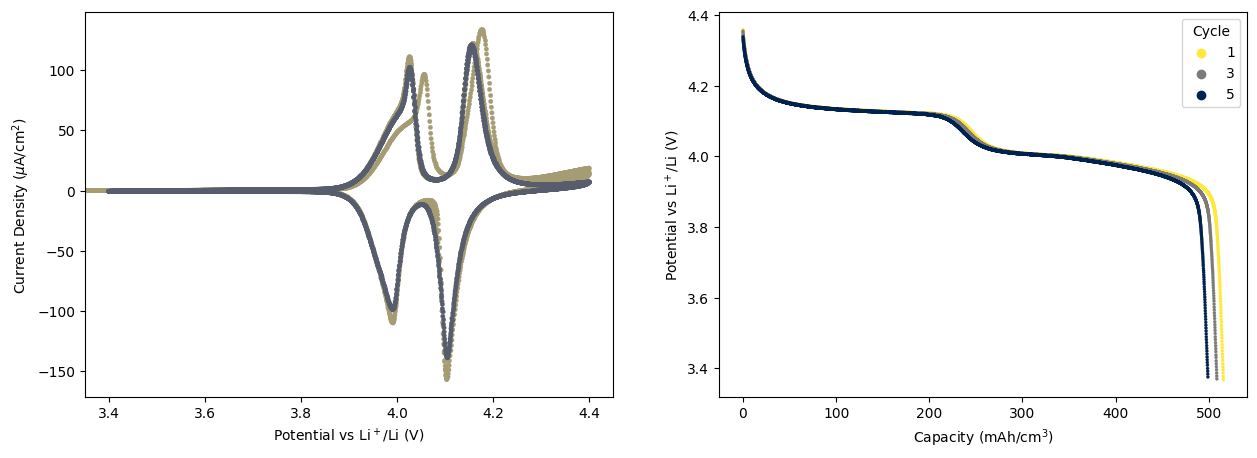

In [143]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_01\0A_02 - Copy'
area = 0.63
thickness = 78
palette = 'cividis_r'
sample = 'After litho process'
setup_files(path)
cv_2, lith_2, capacity_2 = cc(path, area, thickness, sample)

fig, ax = plt.subplots(1,2, figsize = (15, 5), dpi = 100)
sns.scatterplot(data = cv_2, x = 'WE(1).Potential (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'CV', edgecolor = None, s = 10, ax = ax[0], legend = False, palette=palette)

sns.scatterplot(data = lith_2, x = 'Capacity (mAh/cm$^3$)', y = 'WE(1).Potential (V)', edgecolor = None, hue = 'Cycle', s = 5, palette=palette, ax = ax[1])


ax[0].set_xlim(3.35, 4.45)
ax[0].set_xlabel('Potential vs Li$^+$/Li (V)')

ax[1].set_ylabel('Potential vs Li$^+$/Li (V)')

Text(0, 0.5, 'Potential vs Li$^+$/Li (V)')

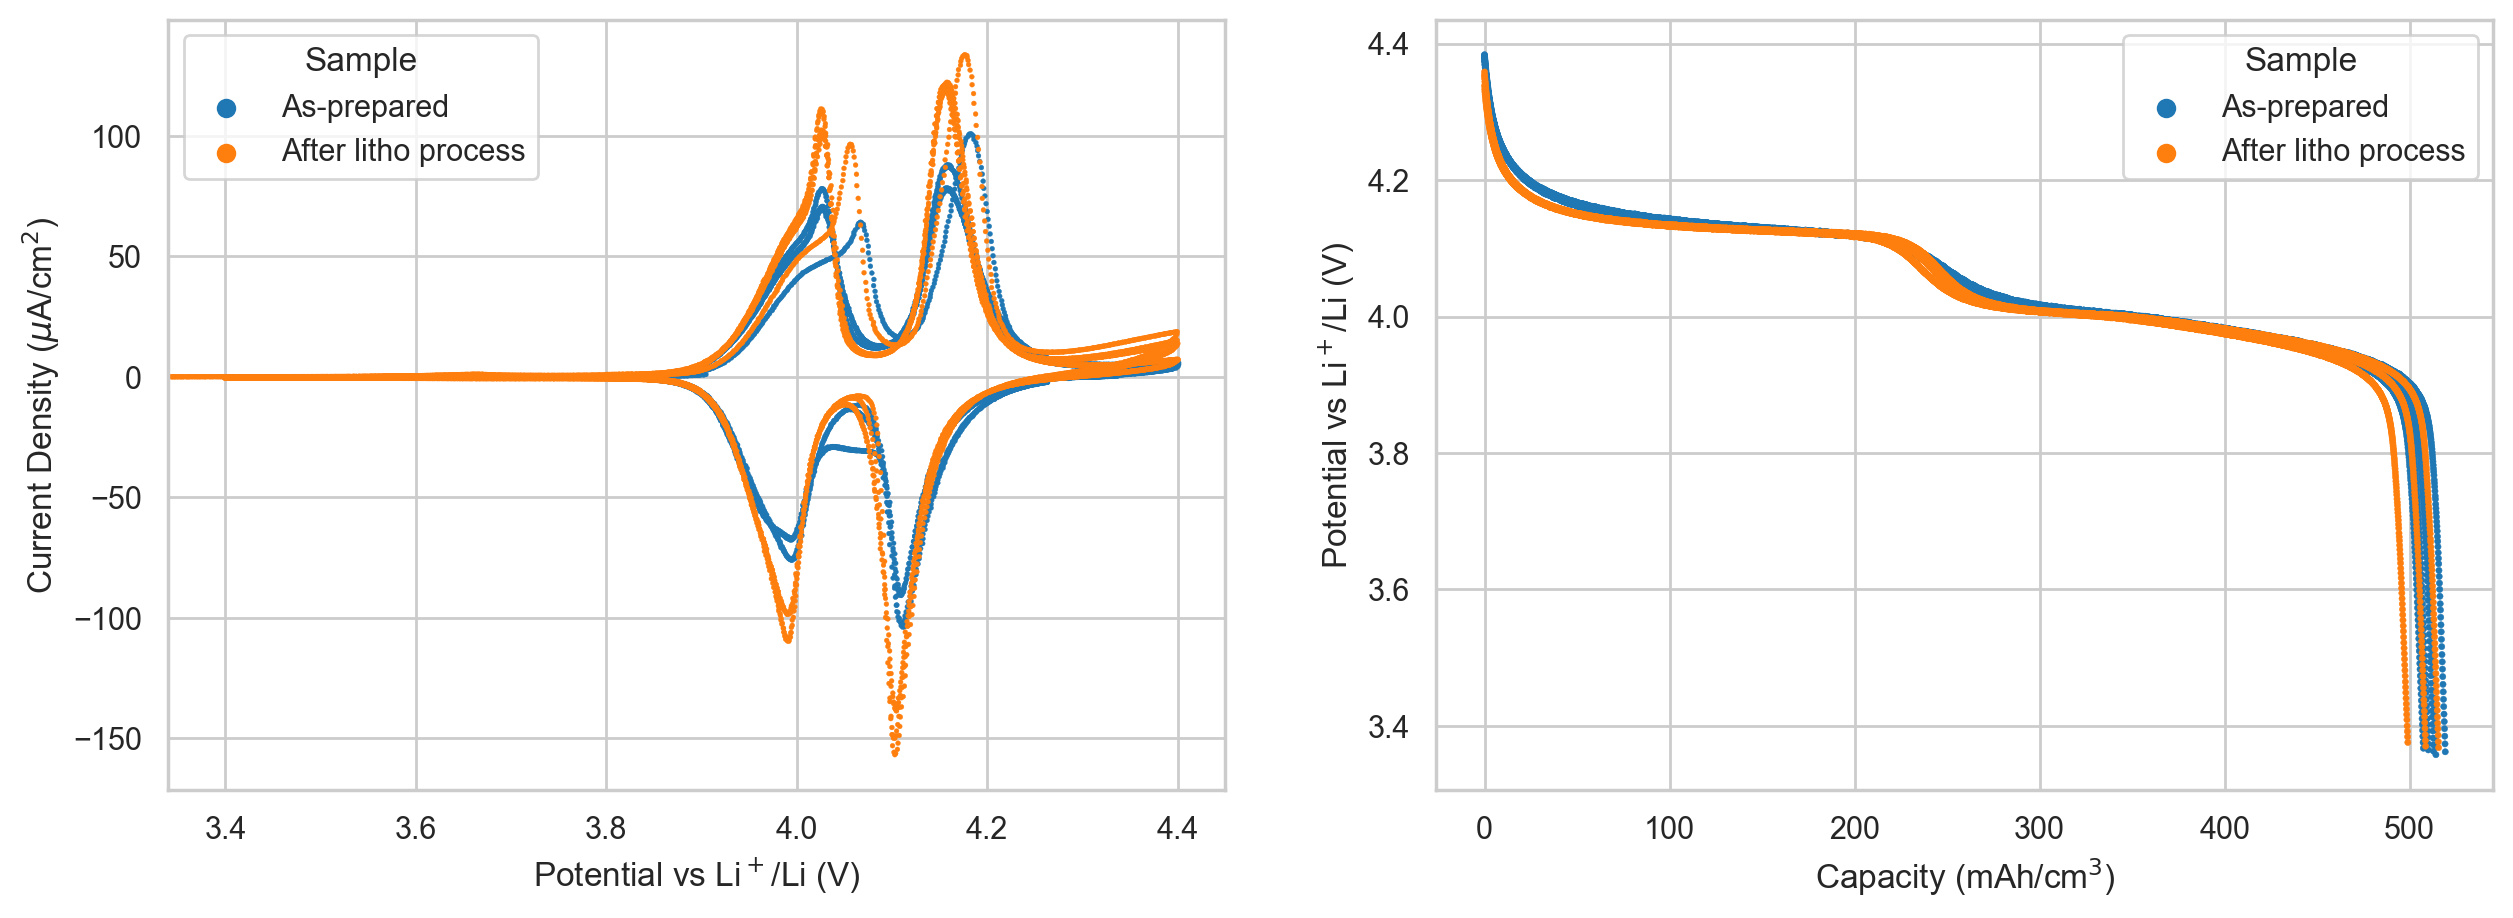

In [151]:
# Comparison
sns.set_theme(style = 'whitegrid')
palette = 'tab10' #'Dark2'

cv_comp = pd.concat([cv, cv_2], ignore_index=True)
lith_comp = pd.concat([lith, lith_2], ignore_index=True)



fig, ax = plt.subplots(1,2, figsize = (15, 5), dpi = 200)
sns.scatterplot(data = cv_comp, x = 'WE(1).Potential (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'Sample', edgecolor = None, s = 3, palette=palette, ax = ax[0])

sns.scatterplot(data = lith_comp, x = 'Capacity (mAh/cm$^3$)', y = 'WE(1).Potential (V)', edgecolor = None, hue = 'Sample', s = 5, palette=palette, ax = ax[1])

ax[0].set_xlim(3.34, 4.45)

ax[0].set_xlabel('Potential vs Li$^+$/Li (V)')

ax[1].set_ylabel('Potential vs Li$^+$/Li (V)')

Text(0, 0.5, 'Potential vs Li$^+$/Li (V)')

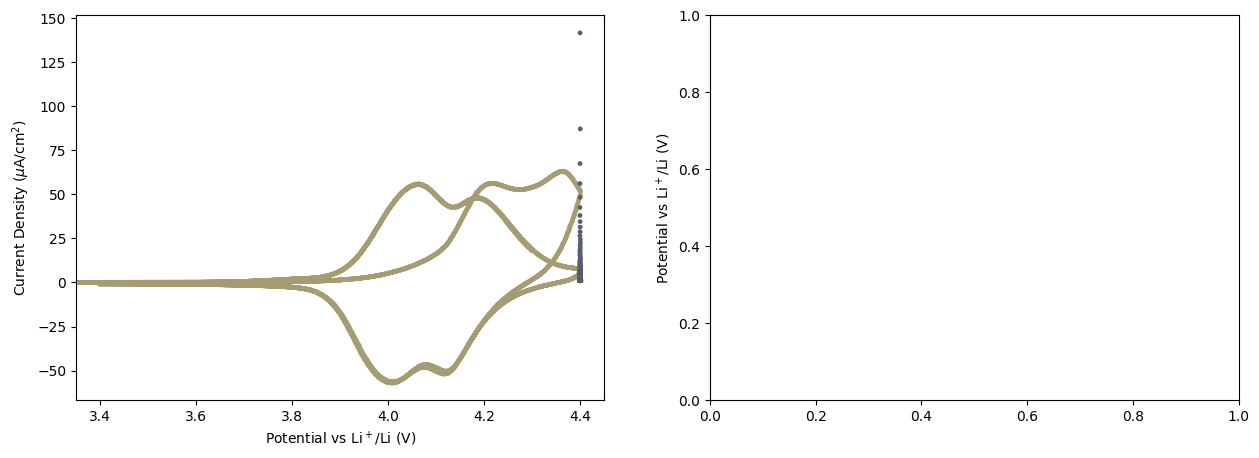

In [148]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_01\Pattern lithiation'
area = 0.63
thickness = 60
palette = 'cividis_r'
sample = 'Patterned LMO'
setup_files(path)
cv_p, lith_p, capacity_p = cc(path, area, thickness, sample)

fig, ax = plt.subplots(1,2, figsize = (15, 5), dpi = 100)
sns.scatterplot(data = cv_p, x = 'WE(1).Potential (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'CV', edgecolor = None, s = 10, ax = ax[0], legend = False, palette=palette)

# sns.scatterplot(data = lith_p, x = 'Capacity (mAh/cm$^3$)', y = 'WE(1).Potential (V)', edgecolor = None, hue = 'Cycle', s = 5, palette=palette, ax = ax[1])


ax[0].set_xlim(3.35, 4.45)
ax[0].set_xlabel('Potential vs Li$^+$/Li (V)')

ax[1].set_ylabel('Potential vs Li$^+$/Li (V)')